# **Sales predictions**

In [82]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter, AutoDateLocator

In [45]:
train = pd.read_csv(os.getcwd()+"/data/train.csv")
test = pd.read_csv(os.getcwd()+"/data/test.csv")
oil = pd.read_csv(os.getcwd()+"/data/oil.csv")
stores = pd.read_csv(os.getcwd()+"/data/stores.csv")
transactions = pd.read_csv(os.getcwd()+"/data/transactions.csv")
holidays = pd.read_csv(os.getcwd()+"/data/holidays_events.csv")


###  **Adding useful information to train**

In [44]:
#droping not usable columns,selecting non tranferred holidays and setting date as index
holidays = holidays.loc[holidays.transferred == False].drop(["transferred","description","locale_name"],axis=1).set_index("date")      
holidays

,type,locale
date,,
2012-03-02,Holiday,Local
2012-04-01,Holiday,Regional
2012-04-12,Holiday,Local
2012-04-14,Holiday,Local
2012-04-21,Holiday,Local
...,...,...
2017-12-22,Additional,National
2017-12-23,Additional,National
2017-12-24,Additional,National


In [ ]:
holidays.type.replace({"Work Day":5,"Transfer":5,"Holiday":5,"Bridge":3},inplace=True)
holidays.locale.replace({"Local":1,"Regional":2,"National":3},inplace=True)


In [43]:
for col in ["type", "locale"]:
    print(col)
    print(holidays.loc[holidays.transferred == False,col].unique())

type
['Holiday' 'Transfer' 'Additional' 'Bridge' 'Work Day' 'Event']
locale
['Local' 'Regional' 'National']


In [46]:
holidays.loc[holidays.type == "Work Day"]

,date,type,locale,locale_name,description,transferred
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
149,2014-12-20,Work Day,National,Ecuador,Recupero Puente Navidad,False
161,2015-01-10,Work Day,National,Ecuador,Recupero Puente Primer dia del ano,False
283,2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False


In [53]:
holidays.loc[holidays.type == "Event"]

,date,type,locale,locale_name,description,transferred
55,2013-05-12,Event,National,Ecuador,Dia de la Madre,False
103,2014-05-11,Event,National,Ecuador,Dia de la Madre,False
106,2014-06-12,Event,National,Ecuador,Inauguracion Mundial de futbol Brasil,False
107,2014-06-15,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Suiza,False
108,2014-06-20,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Honduras,False
113,2014-06-25,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Francia,False
114,2014-06-28,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False
115,2014-06-29,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False
116,2014-06-30,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False
117,2014-07-01,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False


In [67]:
train.loc[(train.store_nbr == 5)& (train.date == "2015-01-01")].shape

(33, 6)

In [68]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


#### **Sales by family**

In [91]:
familySeries = train.groupby(["date","family"]).sum()["sales"].reset_index()

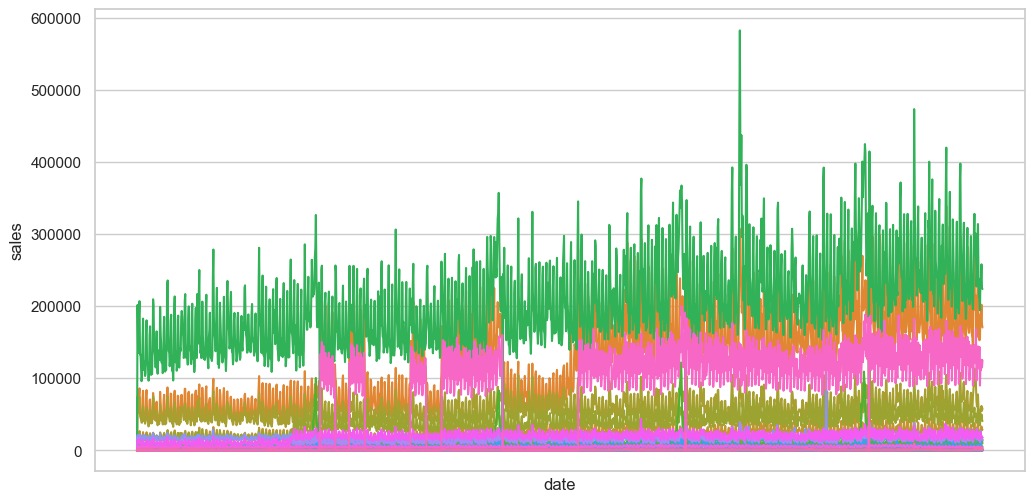

In [97]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.lineplot(x="date",y="sales",hue="family",data=familySeries)
plt.xticks([])
plt.legend().set_visible(False)
plt.show()

#### **Sales by Store**

In [99]:
storeSeries = train.groupby(["date","store_nbr"]).sum()["sales"].reset_index()

/var/folders/8q/9zk58sl93rx81t6np6mvjx200000gn/T/ipykernel_20166/3957624073.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  storeSeries = train.groupby(["date","store_nbr"]).sum()["sales"].reset_index()


In [103]:
storeSeries.loc[storeSeries.store_nbr == 2]

,date,store_nbr,sales
1,2013-01-01,2,0.000000
55,2013-01-02,2,10266.718981
109,2013-01-03,2,7612.540000
163,2013-01-04,2,7526.377000
217,2013-01-05,2,9539.566000
...,...,...,...
90667,2017-08-11,2,13081.771001
90721,2017-08-12,2,12382.416000
90775,2017-08-13,2,13766.822095
90829,2017-08-14,2,12211.461020


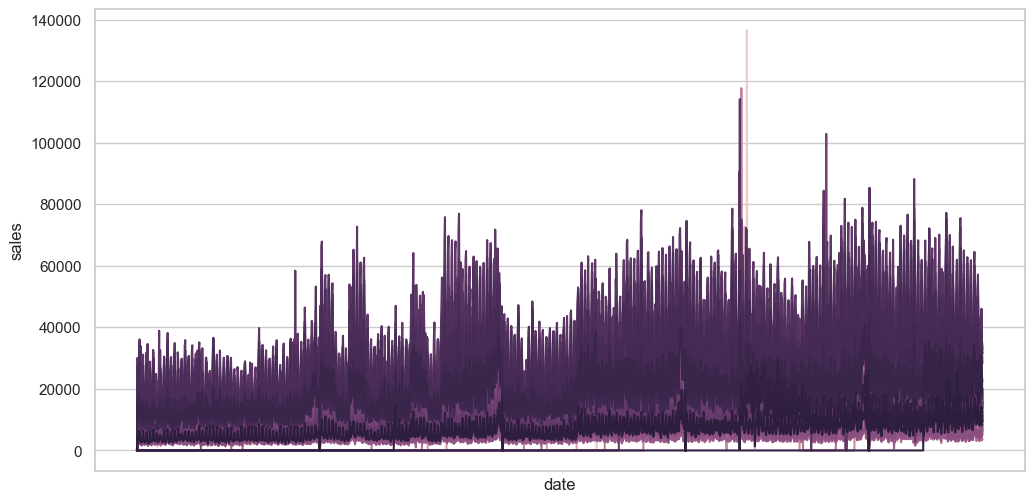

In [100]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.lineplot(x="date",y="sales",hue="store_nbr",data=storeSeries)
plt.xticks([])
plt.legend().set_visible(False)
plt.show()